# Persistence images with kernel density estimatation implementations (SciPy, Scikit-Learn)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.neighbors import KernelDensity

In [2]:
import sys
sys.path.append('../..')
from nid import swcfunctions

In [3]:
ntree = swcfunctions.NTree('../../data/test_swc_data.swc',skiprows=7)
persistence_barcode = ntree.get_persistence_barcode()

In [4]:
p_birth,p_death = zip(*persistence_barcode)

In [5]:
x = np.asarray(p_birth)
y = np.asarray(p_death)

In [6]:
from scipy import stats

In [7]:
# Kernel density estimate using scipy

# establish workspace
X, Y = np.mgrid[0:400:100j,0:400:100j] 
positions = np.vstack([X.ravel(), Y.ravel()])

# KDE using Gaussian kernel
values = np.vstack([x,y]) # data shape: (# dims, # data)
spy_kernel = stats.gaussian_kde(values) # bandwitdth automatically determined 

Z = np.reshape(spy_kernel(positions).T, X.shape)

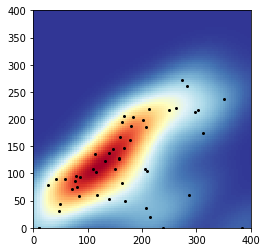

In [8]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.RdYlBu_r,
          extent=[0, 400, 0, 400])
ax.plot(x, y, 'k.', markersize=4)
ax.set_xlim([0, 400])
ax.set_ylim([0, 400])
plt.show()

In [9]:
# Bandwidth used by scipy (Silverman factor * std of data) 
spy_kernel.silverman_factor() * values.std()

43.48681456956075

In [10]:
# Kernel density estimate using sklearn - a little more hands-on 

from sklearn.neighbors import KernelDensity 

skl_kernel = KernelDensity(bandwidth=43.48)
skl_kernel.fit(values.T)

KernelDensity(algorithm='auto', atol=0, bandwidth=43.48, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [11]:
X_grid, Y_grid = np.mgrid[0:400:400j,0:400:400j] 

grid = np.vstack([X_grid.ravel(),Y_grid.ravel()])

Z_sklearn = np.exp(skl_kernel.score_samples(grid.T))

In [12]:
import matplotlib

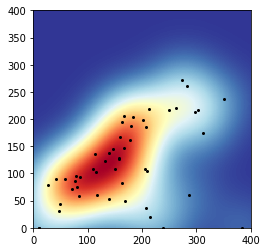

In [13]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z_sklearn.reshape(400,-1)), cmap=plt.cm.RdYlBu_r, extent=[0, 400, 0, 400],norm=matplotlib.colors.Normalize())
ax.plot(x, y, 'k.', markersize=4)
ax.set_xlim([0, 400])
ax.set_ylim([0, 400])
plt.show()

Slight differences b/t SciPy and Sklearn observed-- distance metric (in next step) can be used to quantify. 